In [23]:
import pandas as pd
import networkx
import numpy as np
import networkx as nx


## Representing a Simple Undirected Graph

$G = (V, E)$, where 

$V = \{V_1, V_2, ..., V_n\}$ is a set of nodes (vertex).

$E = \{\{V_k, V_w\}, ..., \{V_i, V_j\}\}$ set of two-sets of edges (links) 

**Order of Graph**: number of vertices $|V|$.

**Size of Graph**: Number of edges $|E|$

**Degree of vertex**: Number of edges adjacent to it

**Neighbours of Vertex (V) in graph G**: It is subset of vertex $V'$ induced by all vertices adjacent to $v$.

**Ego Graph, neighborhood graph**: Ego graph of vertex $v$ in a graph $G$, is subgraph of $G$ is composed of the vertices adjacent to $v$ and all edges connecting vertices adjacent to $v$.

In [8]:

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Milan', 'Paris'), ('Paris', 'Dublin'), ('Milan', 'Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

In [9]:
print(f'Graph Order: {G.order()}')
print(f'Graph Size: {G.size()}')

## accessing the nodes
## Iterating through all the nodes and checking the degree of the node in the graph
print({v: G.degree(v) for v in G.nodes})

## accesing all the neighbors of the nodes

for node in G.nodes:
    print(f'Node: {node}, Neighbours: {list(G.neighbors(node))}')

## Ego Graphs

g_ego = nx.ego_graph(G, 'Paris')

print('Ego Graph -> Paris')
for node in g_ego.nodes:
    print(f'Node: {node}, Neighbours: {list(g_ego.neighbors(node))}')

Graph Order: 4
Graph Size: 4
{'Dublin': 2, 'Rome': 1, 'Milan': 3, 'Paris': 2}
Node: Dublin, Neighbours: ['Milan', 'Paris']
Node: Rome, Neighbours: ['Milan']
Node: Milan, Neighbours: ['Dublin', 'Paris', 'Rome']
Node: Paris, Neighbours: ['Milan', 'Dublin']
Ego Graph -> Paris
Node: Dublin, Neighbours: ['Milan', 'Paris']
Node: Milan, Neighbours: ['Dublin', 'Paris']
Node: Paris, Neighbours: ['Dublin', 'Milan']


In [12]:
G.remove_nodes_from({'Dublin'})

In [13]:
G.edges()

EdgeView([('Rome', 'Milan'), ('Milan', 'Paris')])

## Digraphs: Directed Graphs
A diagraph G has nodes and edges i.e. $G=(V, E)$, where $E = \{(V_k, V_W), ..., (V_i, V_j)\}$ is a set of ordered couples between two nodes belonging to $V$.

$(V_k, V_W)$: The head is $V_W$ and the tail is $V_k$, the node $V_k$ goes into $V_W$

### Indegree
For a vertex $v$, the number of head ends adjacent to $v$ is called the **indegree $deg^-(v)$**.

### Outdegree
The number of tail ends adjacent to $v$ is called the **outdegree $deg^+(v)$**

*Creating a diagraph is very similar to creating a regular graph*

In [5]:
G =  nx.DiGraph()

V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), 
     ('Paris', 'Milan'),
     ('Paris', 'Dublin'),
     ('Milan', 'Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

In [8]:
# couting degrees
print('In Degrees:', {node: G.in_degree(node) for node in G.nodes})

print('Out Degree:', {node: G.out_degree(node) for node in G.nodes})

In Degrees: {'Paris': 0, 'Rome': 1, 'Dublin': 2, 'Milan': 1}
Out Degree: {'Paris': 2, 'Rome': 0, 'Dublin': 0, 'Milan': 2}


## Multigraph

Generalization of graphs that allows multiple edges to have same pair of start and end notes. 

$G=(V, E)$, where $V$ is a set of nodes and $E$ is a multi-set of edges. Directed-Multigraphs also exist.

In [9]:
directed_multi_graph = nx.MultiDiGraph()
undirected_multi_graph = nx.MultiGraph()

V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'),
     ('Milan', 'Dublin'),
     ('Paris', 'Milan'),
     ('Paris', 'Dublin'),
     ('Milan', 'Rome'),
     ('Milan', 'Rome')]

directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

undirected_multi_graph.add_nodes_from(V)
undirected_multi_graph.add_edges_from(E)

[0, 1, 0, 0, 0, 1]

### Weighted Graphs

1. Edge-Weighted Graph (weighted graph): $G=(V, E, w)$ where $V$ is a set of nodes, $E$ is a set of edges, and $w:E \rightarrow \mathbb{R}$ is the weighted function that assignes at each edge $e \in E$ a weight expressed as a real number.

2. Node-weighted graph: $G=(V, E, w)$ but in this case $w:V \rightarrow \mathbb{R}$ is the weight function that assigns at each node $v \in V$ a weight expressed as a real number.

### More Terminology
1. Directed Weighted Graph.
2. Undirected Weighted Graph.
3. Weighted Multigraph.
4. Directed Weighted Multigraph.
5. Undirected Weighted Multigraph.


In [10]:
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin', 19), ('Paris','Milan', 8),
('Paris','Dublin', 11), ('Milan','Rome', 5)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

## Bipartite Graph
A more general form of these graphs is K-Partied graph. The vertices in these graphs are partitioned into `k` set of nodes, respectively. 
**Edges are allowed only between the different sets and NOT within the node of same sets**

In [21]:
n_nodes = 10
n_edges = 12
bottom_nodes = [i for i in range(n_nodes) if i%2 == 0]
top_nodes = [i for i in range(n_nodes) if i%2 != 0]

edges = list(zip(np.random.choice(bottom_nodes, n_edges), np.random.choice(top_nodes, n_edges)))

B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from(edges)

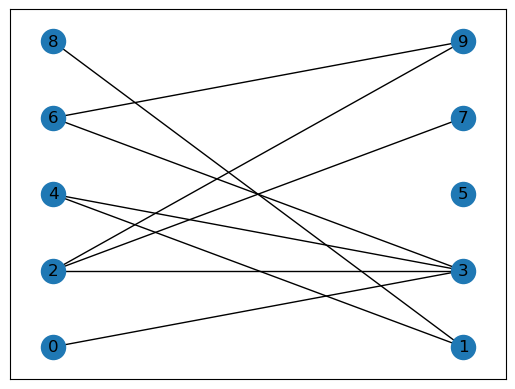

In [22]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

## Adjacency Matrix
The adjecency matrix $M$ of a graph $G=(V, E)$ is a square matrix $(|V| \times |V|)$ such that  its element $M_{ij}$ is 1 when there is an edge from node $i$ to node $j$, and 0 when there is no edge.

### Properties
1. Adjacency Matrices for undirected graphs are always symmetric.
2. Symmetry for the adjacency matrix for directed graphs is not guaranteed. 
3. Multi-graphs can have the adjacency values greater than 1 as multiple edges can exist.
4. For weighted graphs it's equal to the weight of the edge.

In [32]:
# getting the adjacency matrix 
print('Pandas adjacency\n', nx.to_pandas_adjacency(B))

print('Numpy adjacency', '\n The order of the nodes:', B.nodes, '\n',nx.to_numpy_array(B))

Pandas adjacency
      0    2    4    6    8    1    3    5    7    9
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0
4  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0
8  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
Numpy adjacency 
 The order of the nodes: [0, 2, 4, 6, 8, 1, 3, 5, 7, 9] 
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Edge List
The edge list $L$ of graph $G=(V, E)$ is a list of size $|E|$ matrix such that its element $L_i$ is a couple representing the tail and the end node of the edge $i$.


In [33]:
print(nx.to_pandas_edgelist(B))

   source  target
0       0       3
1       2       3
2       2       9
3       2       7
4       4       3
5       4       1
6       6       3
7       6       9
8       8       1


In [41]:
## Plotting simple graphs with networkx
G = nx.Graph()
V = {'Paris', 'Dublin', 'Milan', 'Rome'}

# each element of the edge is
E = [('Paris', 'Dublin', 11),
     ('Paris', 'Milan', 8),
     ('Milan', 'Rome', 5), 
     ('Milan', 'Dublin', 19)]

G.add_nodes_from(V)
G.add_weighted_edges_from(E) 
node_position = {"Paris": [0, 0], "Dublin":[0, 1], "Milan": [1, 0], "Rome": [1, 1]}

{('Paris', 'Dublin'): Text(0.0, 0.5, '11'),
 ('Paris', 'Milan'): Text(0.5, 0.0, '8'),
 ('Rome', 'Milan'): Text(1.0, 0.5, '5'),
 ('Dublin', 'Milan'): Text(0.5, 0.5, '19')}

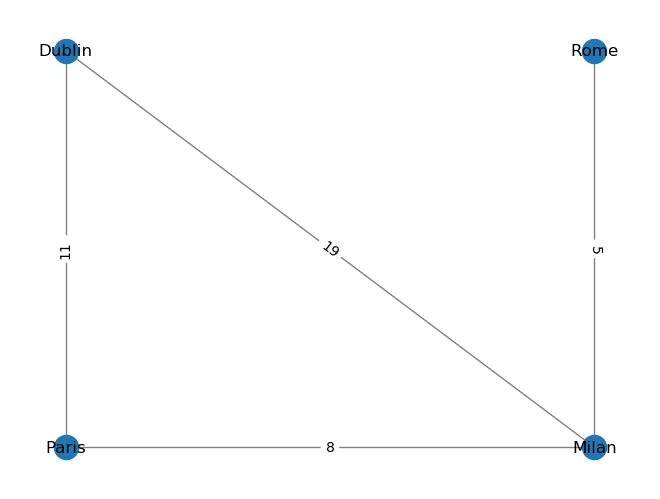

In [45]:
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, node_position, with_labels=True, edge_color='gray')
nx.draw_networkx_edge_labels(G, node_position, edge_labels=edge_labels)


## Graph Properties
Graph derived metrics can be grouped into four categories:
* Integration Metrics: Measure of how nodes tend to be interconnected to each other.
* Segregation Metrics: Quantification of the presence of groups of interconnected nodes, known as communities or modules within a network.
* Centrality Metrics: Assess the importance of individual nodes inside a network.
* Resilience Metrics: Measure of the extent of network's ability to maintain and adapt its operational performance when facing failures or adverse conditions.

**GLOBAL**: Metrics expressing a measure of an overall network.

**LOCAL**: Metrics measure values of individual network elements.


## Integration Metrics

### Distance, path and shortest path

**Distance:** The concept of distance in a graph is often related to the number of edges to traverse in order to reach a target node from a given source node.

**Path:** The set of edges connecting node $i$ to node $j$ is called a path.

**Diameter:** The number of edges contained in the longest shortest path amongst all shortest paths.


### Characteristic path length
It is the average of all the shortest path lengths between all possible pair of nodes. 

$\frac{1}{q(q-1)} \sum_{i \in V} l_i$

Here, $V$ is the set of nodes in the graph and $q=|V|$ represents its order.

Networks having shorter characteristic path lengths promote the quick transfer of information and reduce costs.

However, this metric cannot be always defined since it is not possible to compute a path among all the nodes in disconnected graphs.

### Global efficiency 
It's the average of the inverse shortest path length for all pairs of nodes. 

$\frac{1}{q(q-1)} \sum_{i \in V} \frac{1}{l_{ij}}$

$l_{ij}$: It is the shortest path between node `i` and node `j`.

### Local efficiency 
It is calculated by considering only the neighborhood of the node in the calculation without the node itself. 

In [50]:
G = nx.Graph()
nodes = {
    1: 'Dublin',
    2: 'Paris',
    3: 'Milan',
    4: 'Rome',
    5: 'Naples',
    6: 'Moscow',
    7: 'Tokyo'
}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

path = nx.shortest_path(G, source=1, target=7)
print(f'Path between Dublin and Tokyo: {path}')

Path between Dublin and Tokyo: [1, 3, 4, 5, 7]


# Segregation Metrics

## Clustering Coefficient
Measure of how much nodes cluster together. It is defined as the fraction of triangles around a node and 
is equivalent to the fraction of the node's neighbours that are neighbors of each other.

## Transitivity
Variant of the clustering coefficient. This can be defined as the ratio between the observed number of closed triplets and maximum possible number of closed triplets in the graph.

## Modularity
It was designed to quantify the division of a network in aggregated sets of highly interconnected nodes, commonly known as modules, communities, groups or clusters. 


Segregation metrics help to understand the presence of groups. However, each node has its own importance and to quantify this importance we use the centrality metrics.


# Centrality Metrics

## Degree Centrality
Measures the number of incident edges on a certain node $i$. If a graph is directed, the $in-degree centrality$ and $out-degree centrality$ will be considered for each node.

## Closeness Centrality
It quantifies how much a node is close to other nodes. It refers to the average distance of a node $i$ to all other nodes in the network. 
$l_{ij}$: Shortest path between node $i$ and $j$, the closeness centrality is defined as follows:

$$\frac{1}{\sum_{i \in V, i!=j} l_{ij}}$$

## Betweenness Centrality
Evaluates how much a node acts as a bridge between other nodes. If $L_{wj}$ is the total number of shortest paths between node $w$ and node $j$ and $L_{wj}(i)$ is the total number of shortest paths between $w$ and $j$ passing through node $i$, then the betweenness centrality is defined as:
$$\sum_{w!=i!=j} \frac{L_{wj}(i)}{L_{wj}}$$

# Resilience Metrics

## Assortativity Coefficient
Assortativity is used to quantify the tendency of nodes being connected to similar nodes. One of the most commonly used methods is the **Pearson correlation coefficient** between the degrees of directly connected nodes.



In [51]:
complete_graph = nx.complete_graph(n=7)

**Clique**: A clique C, in an undirected graph is defined a subset of its vertices, $C \subset V$, such that every two distinct vertices are adjacent. 

# Generative Graph Models
Graphs that follow probabilistic and generative models to grow themselves. 

## Watts and Strogatz 
They are used to study the behaviour of **small-world networks** i.e. it resembles up to an extent how the social network grows. The graph is generated by displacing $n$ nodes in a ring and connecting each node with its $k$ neighbours. Each edge of the graph then has a probability $p$ of being rewired to a regular network $(p=0)$ to a complete random network $(p=1)$n

## Barabasi-Albert (1999)
Creation of random scale free networks by using a preferential attachment schema, where a network is created by progressively adding new nodes that have more neighbours. 
The probability for the new node to be attached to the existing node $i$ depends on the degree for the 'i-th' node.

$$p_i = \frac{k_i}{\sum k_j}$$



In [24]:
from scipy.io import mmread

In [25]:
adj_matrix = mmread("../../Desktop/ca-AstroPh/ca-AstroPh.mtx")
graph = nx.from_scipy_sparse_array(adj_matrix)


In [26]:
print(f'edges: {len(graph.edges)}, nodes: {len(graph.nodes)}')
# stats = pd.DataFrame({
#     'centrality': nx.centrality.betweenness_centrality(graph),
#     'c_i': nx.clustering(graph),

#     'degree': nx.degree(graph)
# })

edges: 196972, nodes: 17903


In [27]:
neighbours = [n for n in nx.neighbors(graph, 6933)]
round(len(neighbours)*0.1)

50